# Lecture 16: Data Visualization

```{note}
In the first few lectures of this course, we explored measures of location, dispersion, and shape to communicate the characteristics of the single variable data. In this lecture, we will employ visualization tools - a critical part of the analytical workflow, to uncover patterns and communicate insights more effectivey, particularly for multivariate data. These visual data summaries will enable us to detect trends and spot anomalies, serving as a foundation for more advanced data analysis.
```

---

In [80]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# 2024 ITUS sample individual data
url  <- "https://raw.githubusercontent.com/anmpahwa/CE5540/refs/heads/main/resources/ITUS-IND-PD.csv"
data <- read.csv(url) # Loading Data
str(data)             # Data Structure

'data.frame':	454192 obs. of  22 variables:
 $ Unique_ID         : chr  "2024-30010-1-241-17-13-11-2-2420-4-1-1" "2024-30010-1-241-17-13-11-2-2420-4-10-1" "2024-30010-1-241-17-13-11-2-2420-4-10-2" "2024-30010-1-241-17-13-11-2-2420-4-11-1" ...
 $ Unique_HH_ID      : chr  "2024-30010-1-241-17-13-11-2-2420-4-1" "2024-30010-1-241-17-13-11-2-2420-4-10" "2024-30010-1-241-17-13-11-2-2420-4-10" "2024-30010-1-241-17-13-11-2-2420-4-11" ...
 $ sector            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ stratum           : int  13 13 13 13 13 13 13 13 13 13 ...
 $ district          : int  17 17 17 17 17 17 17 17 17 17 ...
 $ Pop               : int  1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 1642268 ...
 $ day_of_week       : int  2 2 2 6 6 6 6 6 1 1 ...
 $ gender            : int  1 1 2 1 2 1 2 2 1 2 ...
 $ age               : int  45 28 25 45 43 17 21 18 45 42 ...
 $ marital_status    : int  1 2 2 2 2 1 1 1 2 2 ...
 $ education_level   : int  11 5 4 5 1 6 4 6 1 4 ...
 $ empl

## Scatter Plot

A scatter plot is used to visualize the relationship between two quantitative variables. Each point represents a single observation in the dataset, with its position determined by the values of the two variables.

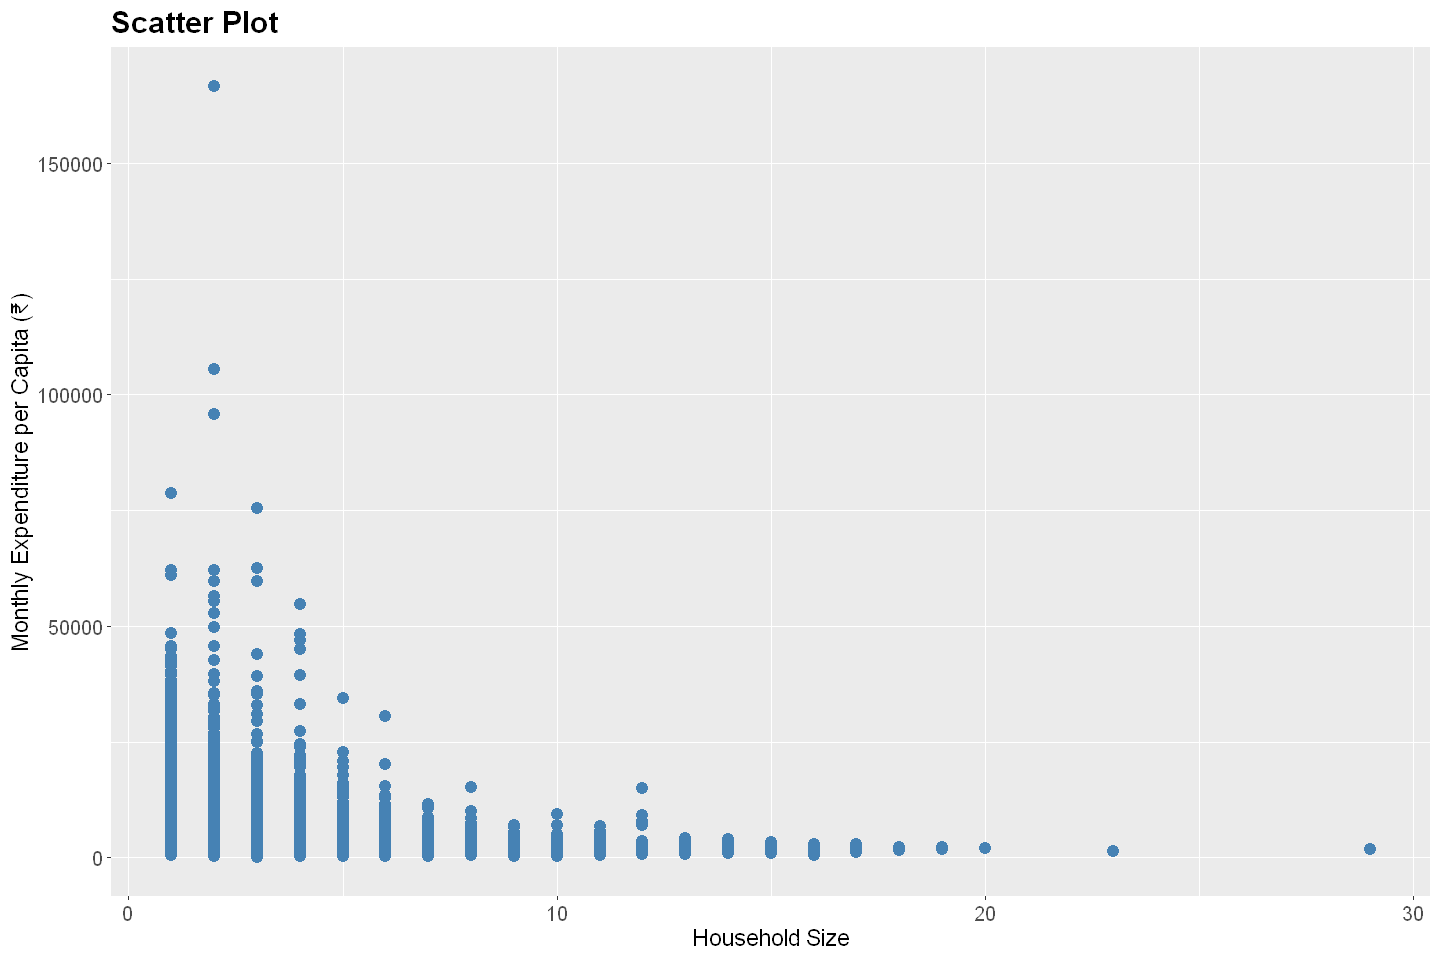

In [3]:
# Create a scatter plot
options(repr.plot.width = 12, repr.plot.height = 8)
ggplot(data, aes(x = household_size, y = total_expenditure / household_size)) +
  geom_point(color = "steelblue", size = 3) +
  labs(
    title = "Scatter Plot",
    x = "Household Size",
    y = "Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

## Line Plot

A line plot is used to show trends, changes, or patterns in a quantitative variable over an ordered dimension. Each point on the line represents an aggregate at a specific ordered level.

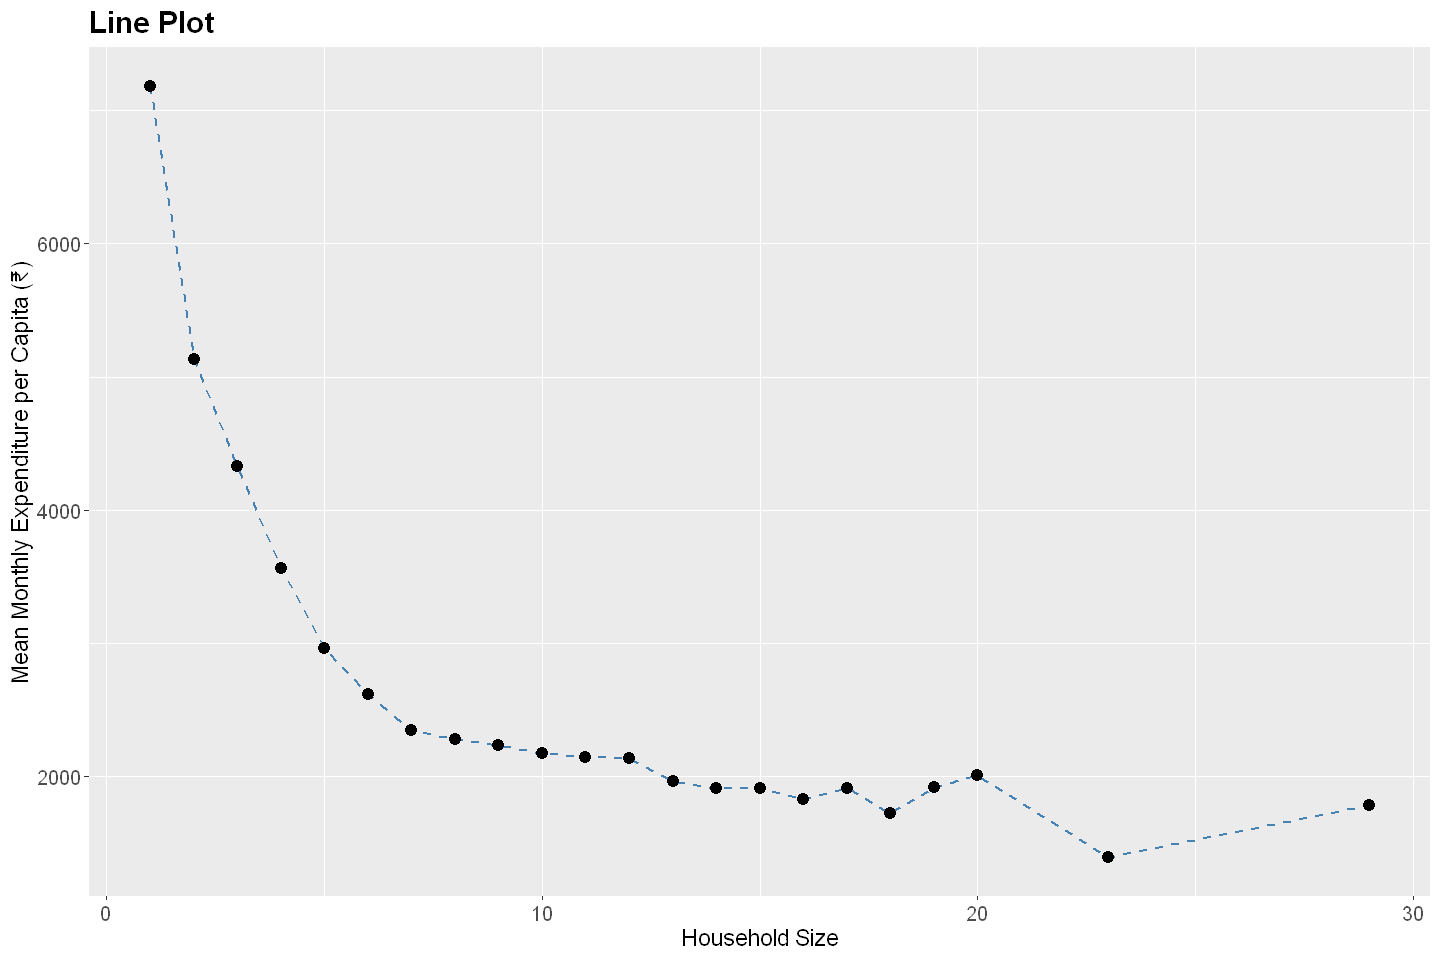

In [46]:
# Prepare data for mean monthly expenditure per capita by household size
df <- data %>%
  group_by(household_size) %>%
  summarise(mean_expenditure = mean(total_expenditure / household_size, na.rm = TRUE))

# Create a line plot
ggplot(df, aes(x = household_size, y = mean_expenditure)) +
  geom_line(color = "steelblue", size = 0.75, linetype = "dashed") +
  geom_point(color = "black", size = 3) +
  labs(
    title = "Line Plot",
    x = "Household Size",
    y = "Mean Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

# Bar Chart

A bar chart is used to compare quantitative values across categories.

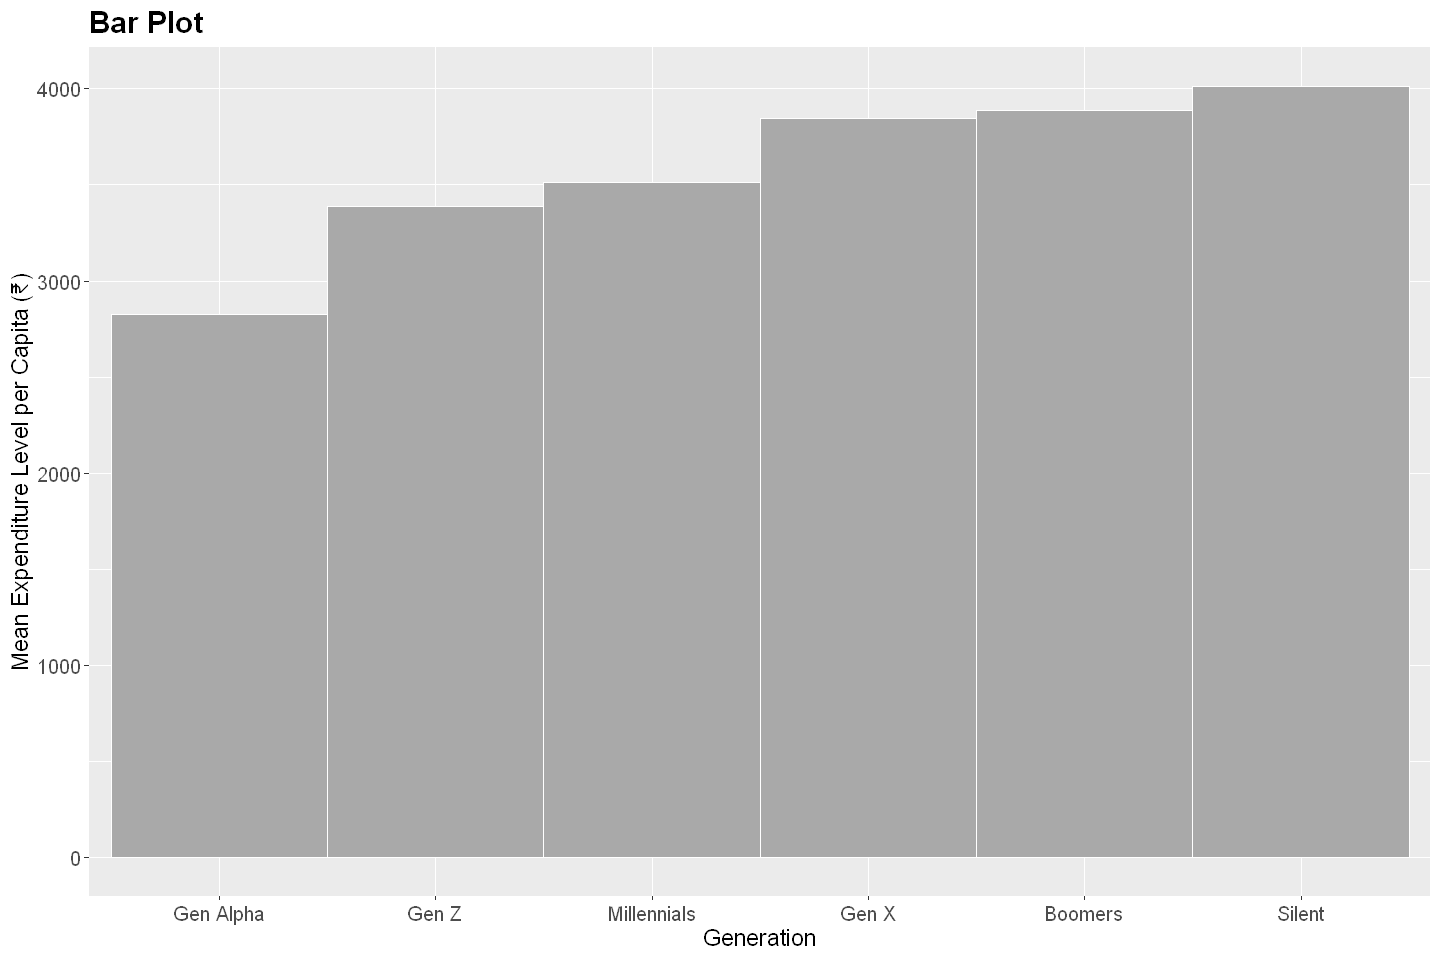

In [45]:
# Add generation column
data <- data %>%
  mutate(generation = case_when(
    age <= 12                    ~ "Gen Alpha",
    age >= 13 & age <= 28        ~ "Gen Z",
    age >= 29 & age <= 44        ~ "Millennials",
    age >= 45 & age <= 60        ~ "Gen X",
    age >= 61 & age <= 79        ~ "Boomers",
    age >= 80                    ~ "Silent",
  ))

# Prepare data for mean monthly expenditure per capita by generation
df <- data %>%
  group_by(generation) %>%
  summarise(mean_expenditure = mean(total_expenditure / household_size, na.rm = TRUE)) %>%
  mutate(generation = factor(generation, levels = c("Gen Alpha", "Gen Z", "Millennials", "Gen X", "Boomers", "Silent"))) %>%
  arrange(generation)

# Create a bar plot
ggplot(df, aes(x = generation, y = mean_expenditure, fill = generation)) +
  geom_bar(stat = "identity", width = 1, color = "white", fill = "darkgray") + 
  labs(
    title = "Bar Plot",
    x = "Generation",
    y = "Mean Expenditure Level per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

# Histogram
A histogram is used to visualize the distribution of a quantitative variable by dividing the data into intervals (bins) and counting the number (or proportion) of observations in each bin. It helps identify patterns in measures of location, dispersion, and shape.

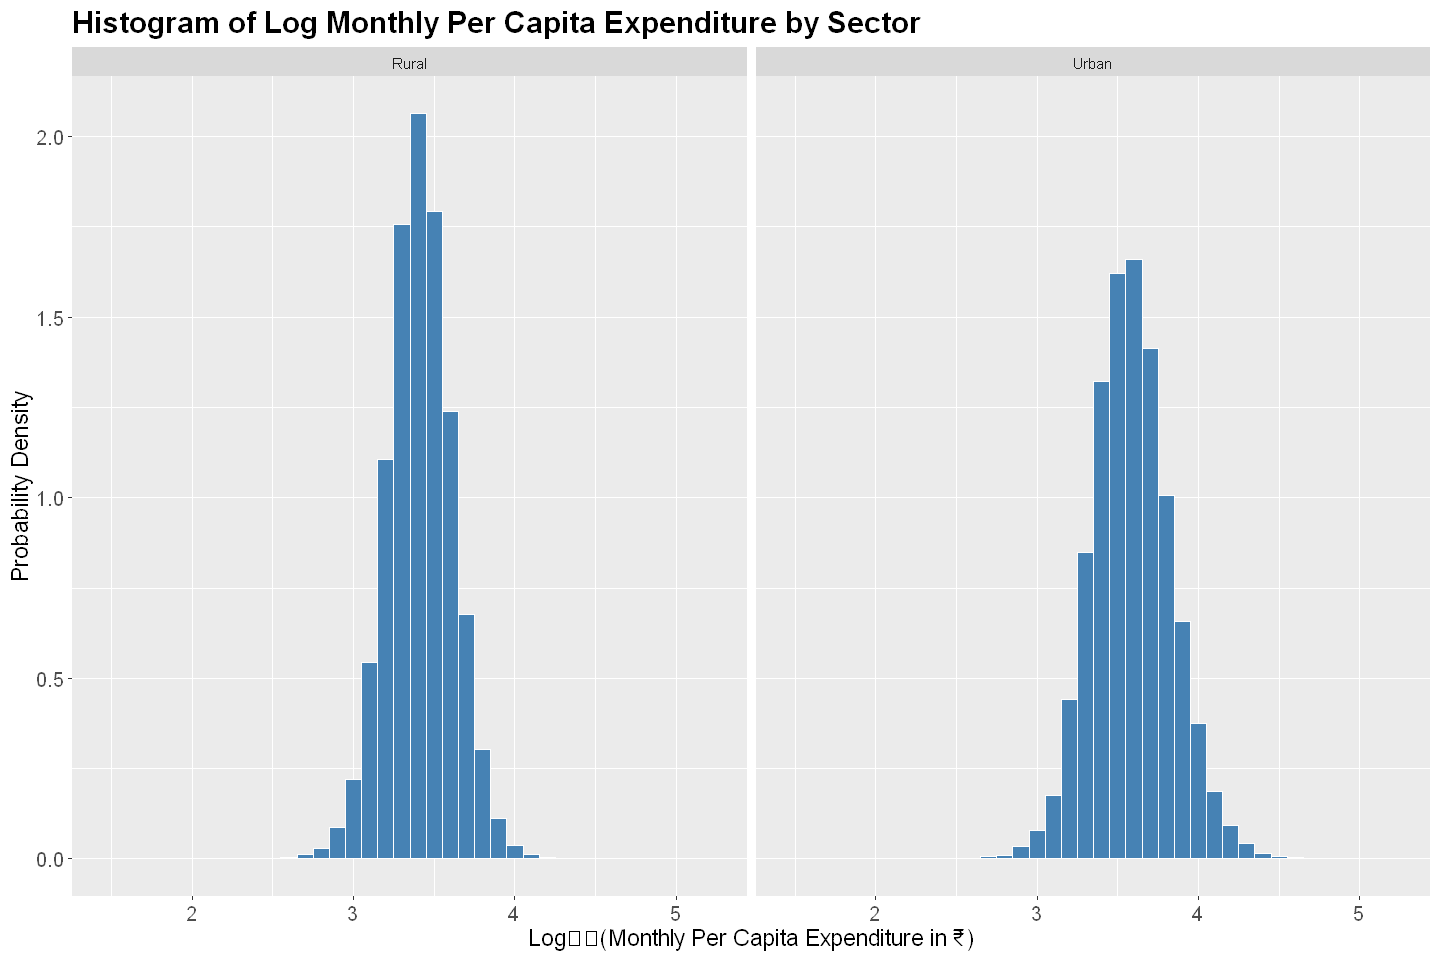

In [ ]:
# Create histogram
ggplot(data, aes(x = log10(total_expenditure / household_size), y = ..density..)) +
  geom_histogram(binwidth = 0.1, fill = "steelblue", color = "white") +
  facet_wrap(~ recode(factor(sector), `1` = "Rural", `2` = "Urban")) +
  labs(
    title = "Histogram",
    x = "Log Monthly Expenditure per Capita  (₹)",
    y = "Probability Density"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )


## Box Plot 
A box plot is used to visualize the distribution of a quantitative variable, displaying the minimum, 1st quartile, median, 3rd quartile, and the maximum. It also helps identify patterns in measures of location, dispersion, and shape.

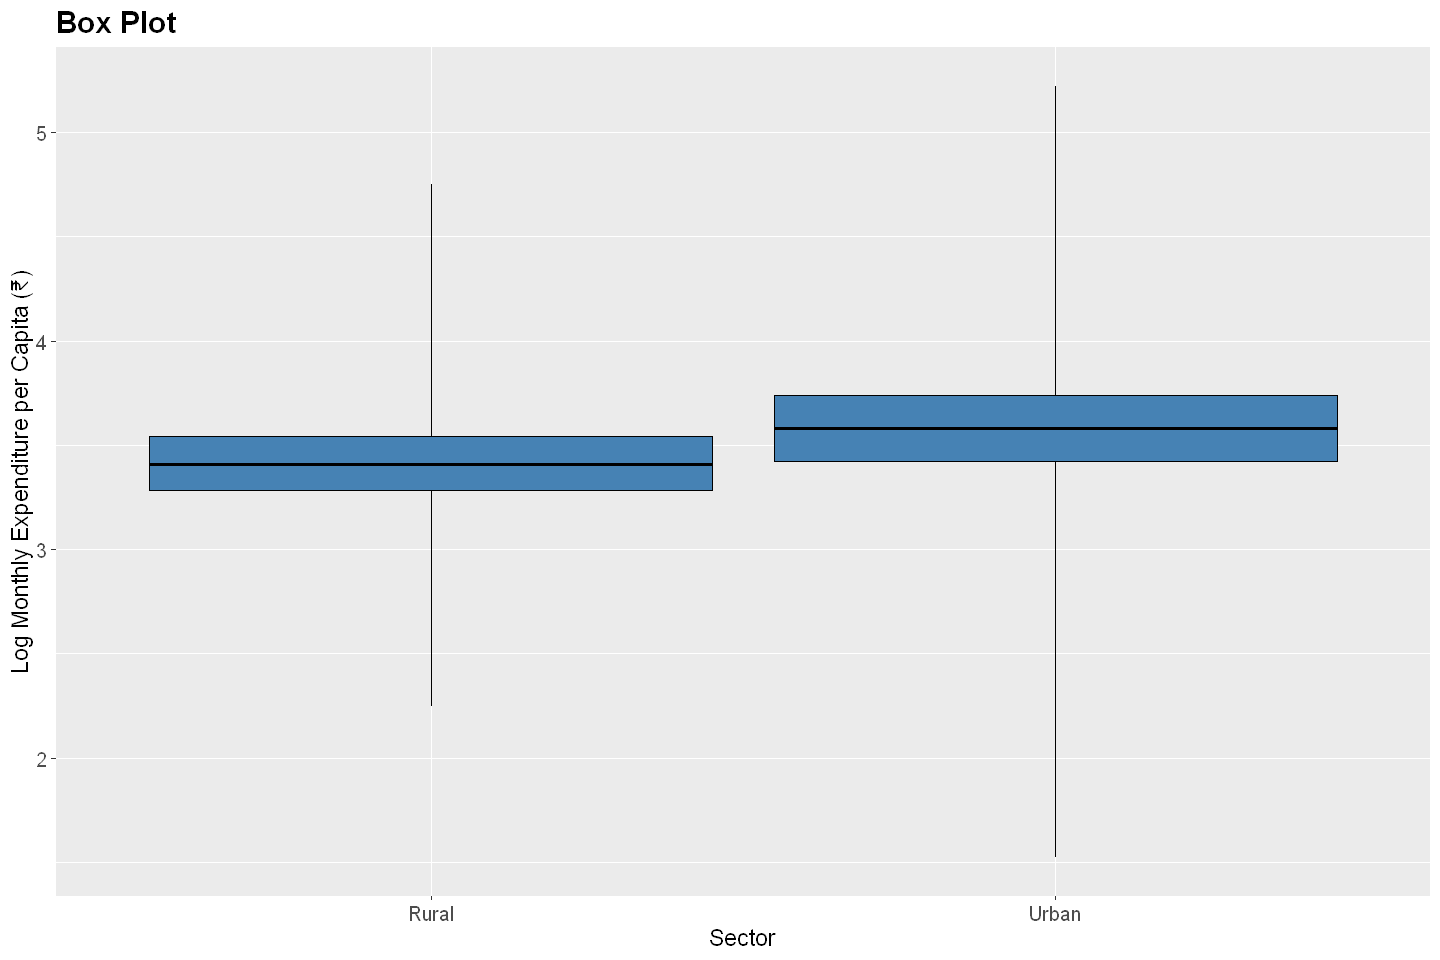

In [123]:
# Compute boxplot stats (min, Q1, median, Q3, max)
df <- data %>%
  group_by(sector) %>%
  summarise(
    min = min(log10(total_expenditure / household_size), na.rm = TRUE),
    lower = quantile(log10(total_expenditure / household_size), 0.25, na.rm = TRUE),
    middle = median(log10(total_expenditure / household_size), na.rm = TRUE),
    upper = quantile(log10(total_expenditure / household_size), 0.75, na.rm = TRUE),
    max = max(log10(total_expenditure / household_size), na.rm = TRUE)
  )

# Create box plot
ggplot(df, aes(x = recode(factor(sector), `1` = "Rural", `2` = "Urban"))) +
  geom_boxplot(
    aes(
      min = min,
      lower = lower,
      middle = middle,
      upper = upper,
      max = max
    ),
    stat = "identity",
    fill = "steelblue",
    color = "black"
  ) +
  labs(
    title = "Box Plot",
    x = "Sector",
    y = "Log Monthly Expenditure per Capita (₹)"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )


---

```{note}
Beyond the scatter plot, line plot, bar chart, histogram, and box plot, we also have advanced visualization tools such as heatmaps (for matrix-style data like OD matrices), density plots (for smoothed distributions), violin plots (to compare distribution shapes across categories), choropleth maps (to display aggregated values across geographic regions, such as zone-wise trip density or vehicle ownership), and geospatial maps (for spatially-referenced point or path data such as GPS traces or transit routes). Each of these enables a more nuanced representation of variability, spatial structure, or comparative patterns in transportation data.
```